# Pandas pour l'analyse de données

User guide : https://pandas.pydata.org/docs/user_guide/10min.html  

Cheat Sheet : https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

Complete course : https://stefaniemolin.com/pandas-workshop

In [2]:
#!pip install pandas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Les données

- tous les articles d'un laboratoire/chercheur/groupe/spécialité (ici le CREST)
- un objectif général : faire des statistiques
- un objectif particulier : comment commencer à analyser les données textuelles

## Importer Pandas

Et le format DataFrame

In [4]:
pwd

'/Users/emilien/Dropbox/Python pour les SHS/Formations/2026-02-02 URFIST Paris Python pour le NLP/M2 - Pandas et champ texte dans un tableau'

In [5]:
data = pd.read_excel("../data/data_hal_crest.xlsx")

In [6]:
type(data)

pandas.DataFrame

## Charger des données

## Explorer les données

In [7]:
data.index

RangeIndex(start=0, stop=2308, step=1)

In [8]:
data.columns

Index(['docid', 'title', 'abstract', 'abstract_eng', 'publicationDate_tdate',
       'document_type', 'authors', 'date'],
      dtype='str')

In [9]:
data.shape

(2308, 8)

In [10]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 2308 entries, 0 to 2307
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   docid                  2308 non-null   int64         
 1   title                  2308 non-null   str           
 2   abstract               2308 non-null   str           
 3   abstract_eng           2049 non-null   str           
 4   publicationDate_tdate  2308 non-null   str           
 5   document_type          2301 non-null   str           
 6   authors                2308 non-null   str           
 7   date                   2308 non-null   datetime64[us]
dtypes: datetime64[us](1), int64(1), str(6)
memory usage: 144.4 KB


Sélectionner une colonne 

In [11]:
data["title"]

0       ["The effect of price magnitude on analysts' f...
1       ['Model-based Clustering with Missing Not At R...
2       ['Inferring the parameters of Taylor’s power l...
3       ['Nonparametric intensity estimation of spatia...
4       ['Impact of the Brexit vote announcement on lo...
                              ...                        
2303    ['Deterioration of mental health and insuffici...
2304    ['La recherche publique a-t-elle des retombées...
2305                           ['Rebalancing IMF Quotas']
2306    ['Factor ARMA representation of a Markov proce...
2307    ['Kernel-based nonlinear canonical analysis an...
Name: title, Length: 2308, dtype: str

In [12]:
type(data["title"])

pandas.Series

Sélectionner deux colonnes

In [13]:
data[["title", "abstract"]]

,title,abstract
0,"[""The effect of price magnitude on analysts' f...",['Recent research in finance shows that the ma...
1,['Model-based Clustering with Missing Not At R...,"['Model-based unsupervised learning, as any le..."
2,['Inferring the parameters of Taylor’s power l...,['Taylor’s power law of fluctuation scaling ha...
3,['Nonparametric intensity estimation of spatia...,['We propose a random forest estimator for the...
4,['Impact of the Brexit vote announcement on lo...,['We examine how the Brexit announcement influ...
...,...,...
2303,['Deterioration of mental health and insuffici...,"[""Objectives : The aim of this study is to pro..."
2304,['La recherche publique a-t-elle des retombées...,['Grâce à un nouvel indicateur mesurant la pro...
2305,['Rebalancing IMF Quotas'],"[""In this paper, we address the issue of IMF q..."
2306,['Factor ARMA representation of a Markov proce...,['We decompose a stationary Markov process (Xt...


## Manipuler un DataFrame

- sélectionner une colonne, une ligne, un élément
- comprendre l'indexation (iloc, loc)

Sélectionner une ligne

In [14]:
data.loc[10]

docid                                                              4061090
title                    ['Tail Risk Inference via Expectiles in Heavy-...
abstract                 ['Expectiles define the only law-invariant, co...
abstract_eng             ['Expectiles define the only law-invariant, co...
publicationDate_tdate                                 2023-01-01T00:00:00Z
document_type                                                         stat
authors                  ['Anthony Davison', 'Simone A. Padoan', 'Gille...
date                                                   2023-01-01 00:00:00
Name: 10, dtype: object

In [15]:
data.loc[10, "title"] = "Tail Risk Inference via Expectiles in Heavy-Tailed Time Series"

## Nettoyer le tableau

In [16]:
data["abstract"] == None

0       False
1       False
2       False
3       False
4       False
        ...  
2303    False
2304    False
2305    False
2306    False
2307    False
Name: abstract, Length: 2308, dtype: bool

In [17]:
data["abstract"].isna().sum()

0

In [18]:
data["authors"].isna().sum()

0

In [19]:
data.columns

Index(['docid', 'title', 'abstract', 'abstract_eng', 'publicationDate_tdate',
       'document_type', 'authors', 'date'],
      dtype='str')

## Analyser les données textuelles

- enlever les crochets des champs textes qui sont du bruit
- regrouper titre et abstract
- calculer la longueur du texte et sa distribution
- identifier les textes qui mentionnent explicitement "artifical intelligence"

In [20]:
data

,docid,title,abstract,abstract_eng,publicationDate_tdate,document_type,authors,date
0,3026577,"[""The effect of price magnitude on analysts' f...",['Recent research in finance shows that the ma...,['Recent research in finance shows that the ma...,2021-01-01T00:00:00Z,shs.eco,"['Tristan Roger', 'Wael Bousselmi', 'Patrick R...",2021-01-01
1,4358212,['Model-based Clustering with Missing Not At R...,"['Model-based unsupervised learning, as any le...","['Model-based unsupervised learning, as any le...",2024-06-18T00:00:00Z,stat.ml,"['Aude Sportisse', 'Matthieu Marbac', 'Fabien ...",2024-06-18
2,4996040,['Inferring the parameters of Taylor’s power l...,['Taylor’s power law of fluctuation scaling ha...,['Taylor’s power law of fluctuation scaling ha...,2025-11-26T00:00:00Z,stat,"['Lionel Truquet', 'Joel E. Cohen', 'Paul Douk...",2025-11-26
3,5357551,['Nonparametric intensity estimation of spatia...,['We propose a random forest estimator for the...,['We propose a random forest estimator for the...,2025-11-10T00:00:00Z,stat.me,"['Christophe Biscio', 'Frédéric Lavancier']",2025-11-10
4,3026615,['Impact of the Brexit vote announcement on lo...,['We examine how the Brexit announcement influ...,['We examine how the Brexit announcement influ...,2020-01-01T00:00:00Z,shs.eco,"['Wael Bousselmi', 'Patrick Sentis', 'Marc Wil...",2020-01-01
...,...,...,...,...,...,...,...,...
2303,4092332,['Deterioration of mental health and insuffici...,"[""Objectives : The aim of this study is to pro...","[""Objectives : The aim of this study is to pro...",2021-01-01T00:00:00Z,qfin,"['A. Gosselin', 'M. Melchior', 'Séverine Caril...",2021-01-01
2304,4083552,['La recherche publique a-t-elle des retombées...,['Grâce à un nouvel indicateur mesurant la pro...,NaN,2023-01-01T00:00:00Z,shs,"['Antonin Bergeaud', 'Arthur Guillouzouic', 'E...",2023-01-01
2305,634790,['Rebalancing IMF Quotas'],"[""In this paper, we address the issue of IMF q...","[""In this paper, we address the issue of IMF q...",2011-02-01T00:00:00Z,shs.eco,"['Agnès Bénassy-Quéré', 'Sophie Béreau']",2011-02-01
2306,678224,['Factor ARMA representation of a Markov proce...,['We decompose a stationary Markov process (Xt...,['We decompose a stationary Markov process (Xt...,2001-06-01T00:00:00Z,shs.eco,"['Serge Darolles', 'Jean-Pierre Florens', 'Chr...",2001-06-01


In [21]:
data["abstract_net"] = (data["abstract"].str.replace("['", "")
    .str.replace('["','')
    .str.replace("']'",'')
    .str.replace('"]',''))

Pour nettoyer, on peut aussi définir une fonction pour une cellule, et l'appliquer sur toute une colonne

In [22]:
def nettoyer(texte):
    """
    Fonction de nettoyage
    """
    texte = str(texte)
    elements_a_remplacer = ['["', "']'",'"]',"['"]
    for element in elements_a_remplacer:
        texte = texte.replace(element, "")
    return texte

La méthode apply permet d'appliquer une fonction à l'ensemble des éléments d'une colonne

In [23]:
data["abstract_net"] = data["abstract"].apply(str).apply(nettoyer)
data["title_net"] = data["title"].apply(nettoyer)
data["texte"] = data["title_net"] + "\n" + data["abstract_net"] 
data["taille"] = data["texte"].apply(len)

Analyser les données

In [24]:
data["taille"].mean()
#pd.Series.mean?

1404.1312824956672

In [25]:
data["taille"].describe()

count     2308.000000
mean      1404.131282
std       1188.389576
min         59.000000
25%        761.000000
50%       1063.000000
75%       1534.250000
max      10608.000000
Name: taille, dtype: float64

<Axes: >

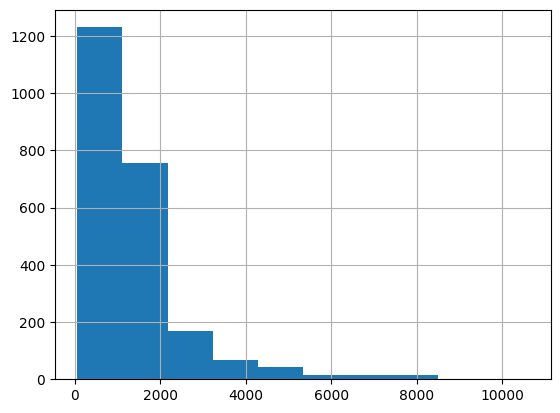

In [26]:
data["taille"].hist()

## Calculer sur des colonnes

Quelques outils utiles pour décrire les données :

- `mean()`
- `std()`
- `min()`
- `max()`
- `count()`
- `describe()`
- `unique()` (et `nunique()`)
- `value_counts()`

## Aller vers une base de données

- filtrer
- grouper
- aller plus loin (join, etc.)

## Modifier le tableau

- colonnes, index
- contenu
- concat/join

## Recoder

- remplacer
- valeurs nulles
- fonctions comme .cut
- solition générique de .apply

## Faire des statistiques

- univariées
- bivariées : tableau croisé
- grouper des tableaux (.concat)
- visualisations

## Sauvegarder les données

## Pandas et le texte

https://pandas.pydata.org/docs/user_guide/text.html

### Analyser une colonne de texte

- Nombre de mots de chaque abstract ; faire un graphique
- Ajouter une colonne s'il y a la présence d'un mot clé lié à l'IA dans le résumé


### Utiliser les expressions régulières

- https://www.w3schools.com/python/python_regex.asp